Используем уже известный нам набор данных "International Airline Passengers" (количество международных авиапассажиров за месяц). Этот датасет доступен в интернете и часто используется для демонстрации методов анализа временных рядов.
В этом задании мы создадим модель LSTM для предсказания количества пассажиров на основе предыдущих данных.

### Задание: Прогнозирование временного ряда с использованием LSTM

#### Цель
Создать и обучить модель LSTM для предсказания количества международных авиапассажиров на основе временного ряда.

#### Теория

- **Модель LSTM** может использоваться для предсказания последовательности значений на основе предыдущих наблюдений. Она хорошо справляется с задачами, где важно учитывать зависимость данных во времени.

#### Описание кода

1. **Выбор и загрузка набора данных:**  
   Мы используем набор данных "International Airline Passengers", который можно загрузить с помощью URL.

2. **Предобработка данных:**  
   - Нормализация данных.
   - Создание обучающих и тестовых выборок.
   - Формирование временных окон для данных.

3. **Создание и обучение модели:**  
   - Построение модели LSTM для предсказания временного ряда.
   - Обучиние модели на тренировочных данных.

4. **Оценка модели и визуализация результатов:**  
   - Оценим модель на тестовых данных.
   - Визуализируем реальные и предсказанные значения.


### Домашнее задание

1. **Улучшение модели:**  
   - Измените архитектуру модели, добавив больше слоев или изменив количество нейронов.
   - Попробуйте различные гиперпараметры, такие как количество эпох, размер батча и функции активации.

2. **Анализ результатов:**  
   - Оцените модель с использованием метрик, таких как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE).
   - Исследуйте влияние различных временных окон на качество прогноза.
   
3. **Отправьте ссылку на ваш блокнот в Colab преподавателю.**

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0202
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0049
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

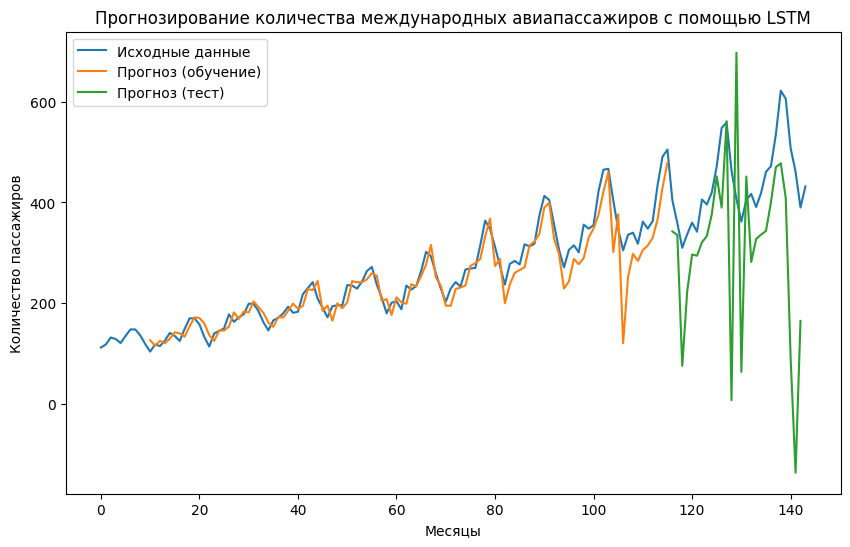

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Создание обучающих и тестовых выборок
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Построение модели LSTM
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Построение прогноза для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Построение прогноза для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()


#Домашнее задание
Улучшение модели:

Измените архитектуру модели, добавив больше слоев или изменив количество нейронов.

Попробуйте различные гиперпараметры, такие как количество эпох, размер батча и функции активации.

Анализ результатов:

Оцените модель с использованием метрик, таких как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE).

Исследуйте влияние различных временных окон на качество прогноза.
Отправьте ссылку на ваш блокнот в Colab преподавателю.

Пример данных:
      Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - loss: 0.0823 - val_loss: 0.0304
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0185 - val_loss: 0.0286
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0127 - val_loss: 0.0539
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0096 - val_loss: 0.0224
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0097 - val_loss: 0.0239
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - val_loss: 0.0244
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0096 - val_loss: 0.0224
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - val_loss: 0.0225
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0061 - val_loss: 0.0271
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0084 - val_loss: 0.0225
Epo

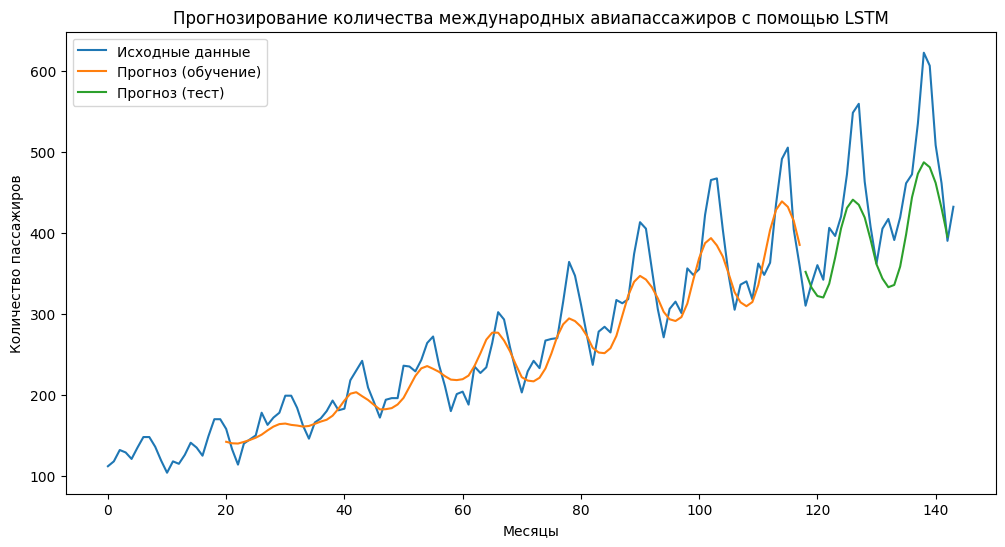

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
import requests
import io

# Шаг 1. Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Шаг 2. Просмотр первых строк данных
print("Пример данных:\n", data.head())

# Шаг 3. Преобразование данных
data = data['Passengers'].values.astype(float)

# Шаг 4. Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Шаг 5. Создание временных окон
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 20  # Увеличен размер окна
X, y = create_dataset(data_normalized, time_step)

# Шаг 6. Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Шаг 7. Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Шаг 8. Построение модели LSTM
model = Sequential()
model.add(Input(shape=(time_step, 1)))  # Входной слой
model.add(LSTM(64, return_sequences=True))  # Первый слой LSTM
model.add(Dropout(0.2))  # Регуляризация
model.add(LSTM(64, return_sequences=False))  # Второй слой LSTM
model.add(Dropout(0.2))  # Регуляризация
model.add(Dense(50, activation='relu'))  # Полносвязный слой
model.add(Dense(1))  # Выходной слой

# Шаг 9. Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Шаг 10. Обучение модели
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

# Шаг 11. Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Шаг 12. Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Шаг 13. Вычисление метрик
mse = mean_squared_error(y_test[0], test_predict[:, 0])
mae = mean_absolute_error(y_test[0], test_predict[:, 0])
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Шаг 14. Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Прогноз для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Прогноз для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()
